# EarthNet Challenge Demo

This is a quick demo to familiarize yourself with the data from the Earthnet2021 data set (for more info, check out https://www.earthnet.tech/docs/ds-specifications/).

For this demo we will only use the 1st tile (29SND) of the training and test set.

Pipeline


1.   Loading data
1.   Model (initially just constant), will be replaced by real one
1.   Prediction
1.   Evaluation
1.   Visualization




The first step will be to pip install earthnet, in case this has not been done already.

In [1]:
%%capture
!pip install earthnet

Now, we can (hopefully) import all the necessary libraries. If this should not be the case, please install the packages you do not have.

In [2]:
import earthnet as en
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as st

import torch as nn

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### 1. Loading data

In the following, the data will be loaded. In order for this to work, you must first have downloaded this to a directory of your choice. Please edit the following paths to point to the locations of train and test data.

In [3]:
trainPath = '/content/drive/MyDrive/ETH/DSLab/train_000/train/'
testPath = '/content/drive/MyDrive/ETH/DSLab/iid_000/iid_test_split/'

As a comparison display the first train and test cube satelite images.

The test data is split between 10 context frames and 20 target frames, that we want to predict.


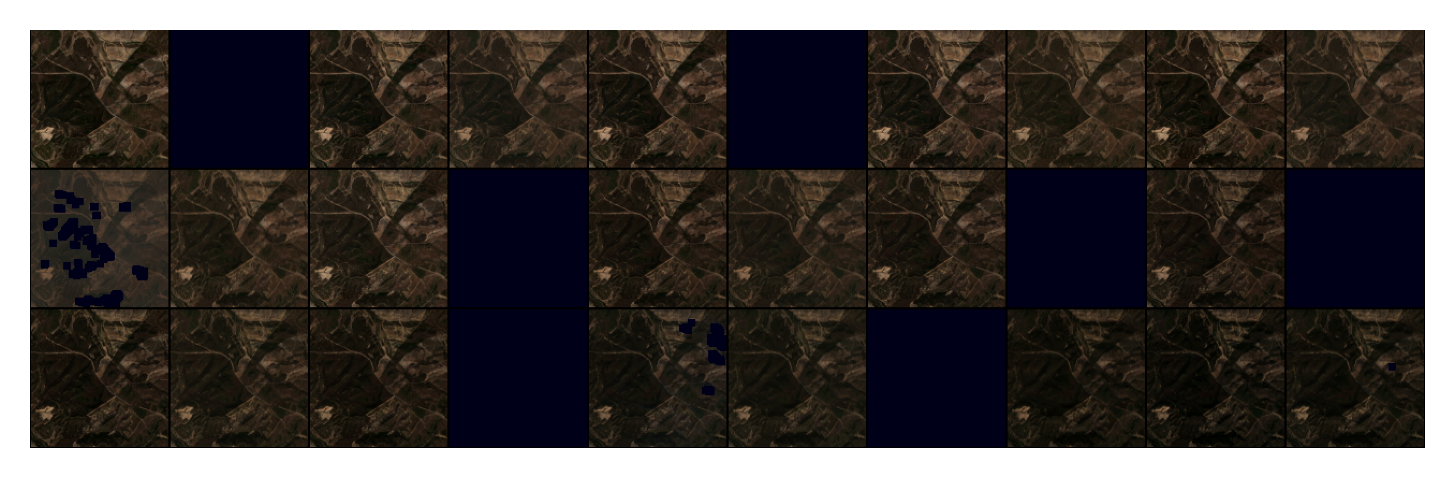

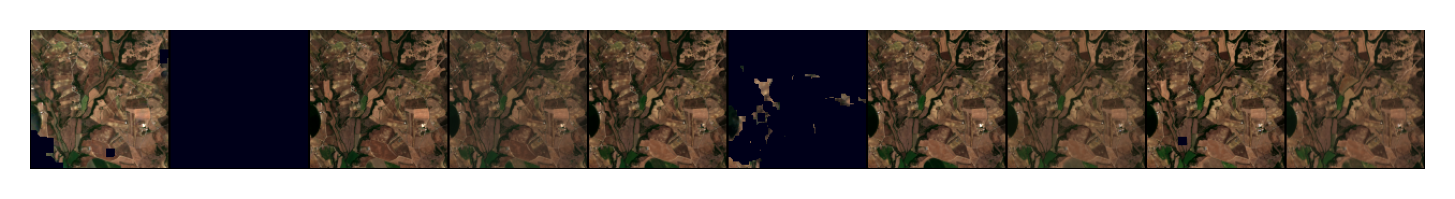

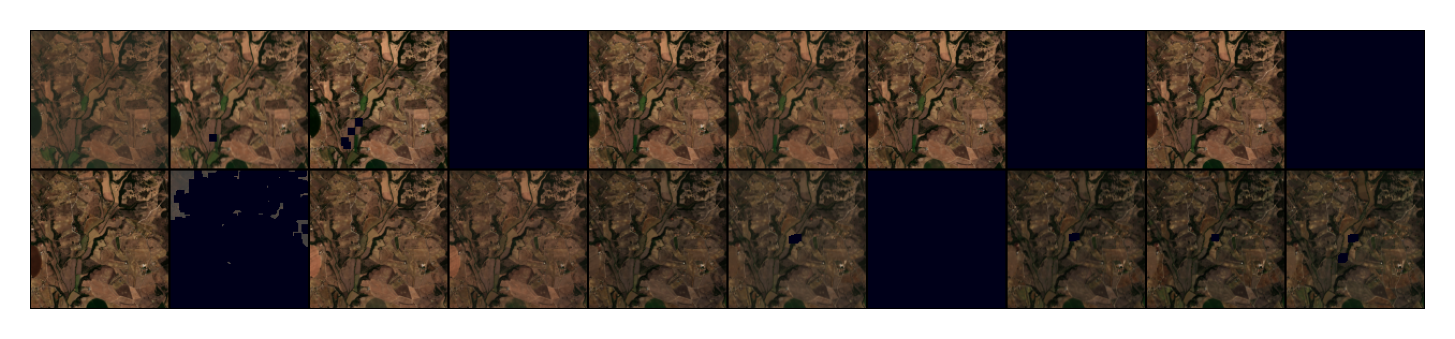

In [4]:
trainSample = en.cube_gallery(trainPath + '29SND/29SND_2017-06-20_2017-11-16_1849_1977_3641_3769_28_108_56_136.npz', 'rgb')
plt.show()

testSample = en.cube_gallery(testPath + 'context/29SND/context_29SND_2017-06-20_2017-11-16_1977_2105_1721_1849_30_110_26_106.npz', 'rgb')
plt.show()

testSample = en.cube_gallery(testPath + 'target/29SND/target_29SND_2017-06-20_2017-11-16_1977_2105_1721_1849_30_110_26_106.npz', 'rgb')
plt.show()

Each cubename has: format:tile_startyear_startmonth_startday_endyear_endmonth_endday_hrxmin_hrxmax_hrymin_hrymax_mesoxmin_mesoxmax_mesoymin_mesoymax.

tile, startyear, startmonth, startday, endyear, endmonth, endday, hrxmin, hrxmax, hrymin, hrymax, mesoxmin, mesoxmax, mesoymin, mesoymax

Hence it contains the exact spatiotemporal footprint of the particular sample.
Note that this is not so reliable, cubes from identical tiles have different mesoscale coordinates!

In [5]:
print(en.get_coords_from_cube('29SND_2017-06-10_2017-11-06_2105_2233_2873_3001_32_112_44_124.npz', return_meso=True)) 
print(en.get_coords_from_cube('29SND_2017-06-30_2017-11-26_1721_1849_3129_3257_26_106_48_128.npz', return_meso=True))

print(en.get_coords_from_cube('29SND_2017-06-20_2017-11-16_5049_5177_5049_5177_78_158_78_158.npz', return_meso=False))
print(en.get_coords_from_cube('29SND_2017-06-30_2017-11-26_5305_5433_1593_1721_82_162_24_104.npz', return_meso=True))

(-8.512576067391539, 39.20846337546288, -8.482756765661781, 39.231402809059226, -8.992731804111772, 39.72795445330851, -8.974056072824355, 39.7423681266785)
(-8.601787690774609, 39.162666022625764, -8.57201668426576, 39.185628744258054, -8.994132139828988, 39.72723371434164, -8.975456894707467, 39.74164761491162)
(-7.837132167314764, 38.81152234393948, -7.807267744605628, 38.834289950336746)
(-7.767367322560887, 39.433629274409135, -7.737211527462129, 39.45637197588313, -8.98106186325666, 39.731557225758415, -8.962382729285563, 39.74596901138581)


### 1.5 Data Cleaning & Preprocessing

We will most likely need to do some preprocessing & cleaning to deal with missing data (covered by clouds) or to extract useful information like drainage area.

### 2. Model

Here will train our model. For now will use a constant model, later it will be replaced with the real one.

In [6]:
def trainModel(data, params):
    return
    # just a placeholder for now

### 3. Prediction

Here our trained model outputs predictions on the testing data.

In [7]:
def predict(dataFile):
    # Make new cube with predictions, for now just return a conatant target file
    return testPath + 'target/29SND/target_29SND_2017-07-30_2017-12-26_3897_4025_2745_2873_60_140_42_122.npz'

### 4. Evaluation

Get an Earth Net Score (ENS) for our predictions according to the formula:

ENS = 4/(1/MAD + 1/OLS + 1/EMD + 1/SSIM) 

In [8]:
def getENS(output):
    # Sometimes the Structural Similarity Index Measure (SSIM) gives 0 (no wonder we are always returning the same prediction).
    if output['SSIM']==0:
        print("HEREEEEEEEEEEEEE")
    if output['SSIM']==0:
        output['SSIM']=0.001
    denom = 1/output['MAD'] + 1/output['OLS'] + 1/output['EMD'] + 1/output['SSIM']
    return 4/denom

In [9]:
%%capture
# produces lots of NaN warnings, possibly cloudy images or due to the constant predictions, TBC

testDataPath = testPath + 'context/29SND/'
testTargetPath = testPath + 'target/29SND/'

pathD, dirsD, filesD = next(os.walk(testDataPath))
filesD = sorted(filesD)
pathT, dirsT, filesT = next(os.walk(testTargetPath))
filesT = sorted(filesT)

file_count = len(filesD)
scores = []
for i in range(file_count):
    print(i)
    preds = predict(testDataPath + filesD[i])
    # Get ENS score for a single cube
    score = en.parallel_score.CubeCalculator.get_scores(
        {"pred_filepath": preds, "targ_filepath": testTargetPath + filesT[i]})
    print(score)
    predENS = getENS(score)
    scores.append(predENS)


In [10]:
# The model's saverage performace accross the test set
print(st.mean(scores))

0.0265765556681206


### 5. Visualizations

Some visualization of data cubes to see model performance once we output new predictions.

Further visualizations can be found in the data_look.ipynb notebook.

Mesodynamic data such as Precipitation (RR), Sea pressure (PP), Mean temperature (TG), Minimum temperature (TN), Maximum temperature (TX)

In [12]:
# Accessing separate components of cubes of a single multicube

sample = np.load(trainPath + '29SND/29SND_2017-06-20_2017-11-16_1849_1977_3641_3769_28_108_56_136.npz')
hrd = sample['highresdynamic']
# Accessing mesoscale dynamic variables (the E-OBS weather data)
md = sample["mesodynamic"]

# Accessing high-resolution and mesoscale static variables (the EUDEM digital elevation model)
hrs = sample["highresstatic"]
ms = sample["mesostatic"]

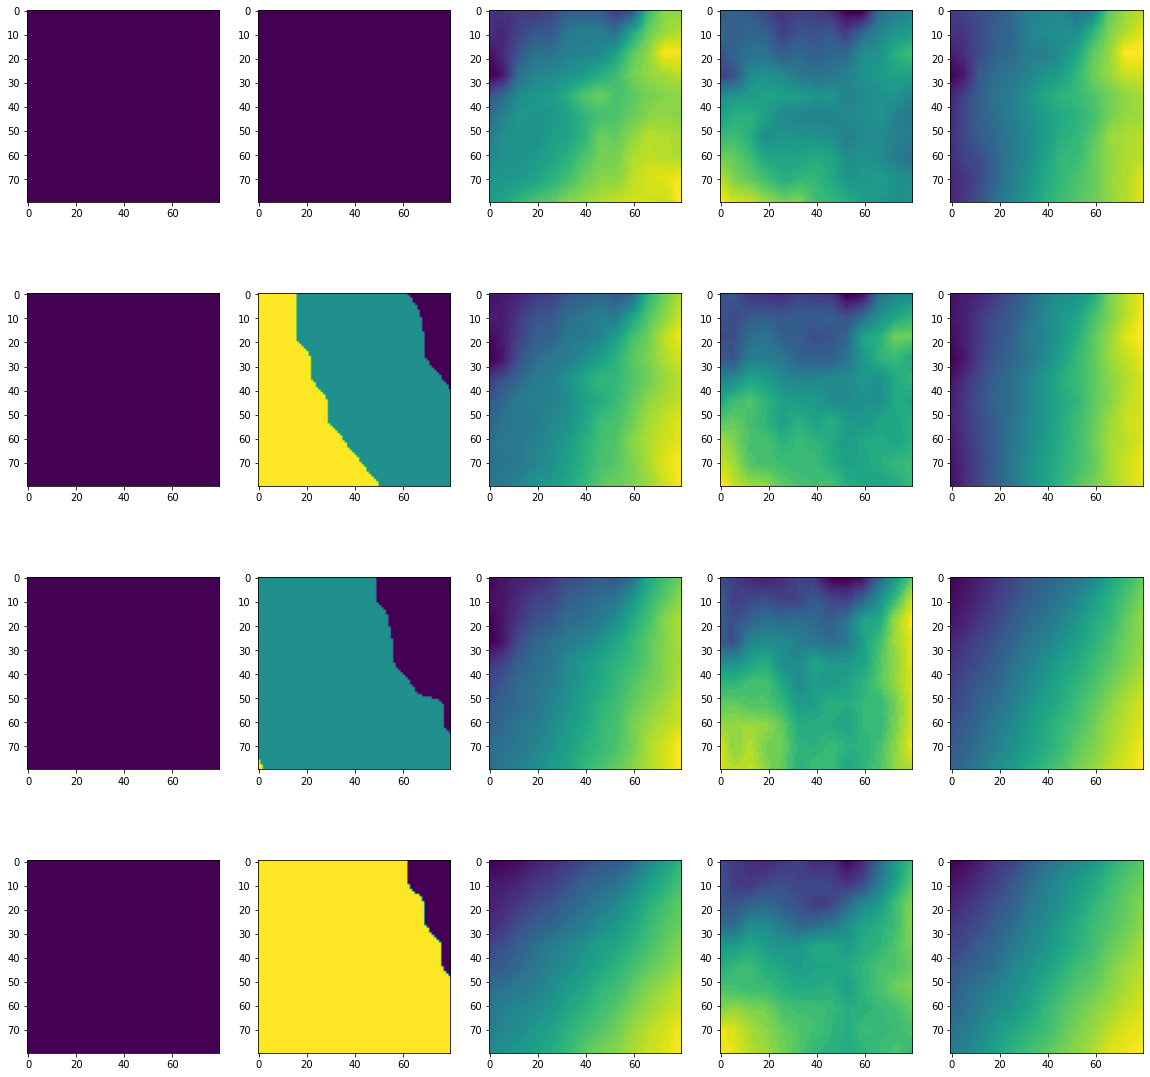

In [13]:
pic = md.astype(float)
ts = 4
fig, axs = plt.subplots(nrows=ts,ncols = 5)
fig.set_size_inches(20,20)
for j in range(ts):
    for i in range(5):
        axs[j,i].imshow(pic[:,:,i,j])
plt.show()

High-resolution static data from the EU Copernicus Monitoring Service.

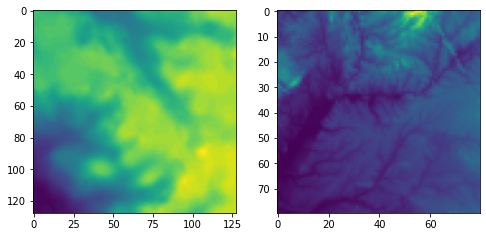

In [14]:
pic = hrs.astype(float)
pic_meso = ms.astype(float)
fig, axs = plt.subplots(nrows=1,ncols = 2)
fig.set_size_inches(8,16)
axs[0].imshow(pic[:,:,0])
axs[1].imshow(pic_meso[:,:,0])